In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

###  Least Squares Estimators

Estimation by least squares can be traced back to Legendre (1805) and Gauss (1810) (see Stigler, 1986). In the particular case of linear regression, we observe $(z_i, y_i), i = 1, \dots, n$, where:

$$
y_i = a + b x_i + \epsilon_i, \quad i = 1, \dots, n,
$$

and the variables $\epsilon_i$ represent errors. The parameters $(a, b)$ are estimated by minimizing the distance:

$$
\sum_{i=1}^n \left(y_i - a x_i - b\right)^2
$$

in $(a, b)$, yielding the least squares estimates.

If we add more structure to the error term, in particular $\epsilon_i \sim N(0, \sigma^2)$, independent (equivalently, $y_i | x_i \sim N(a x_i + b, \sigma^2)$), the log-likelihood function for $(a, b)$ is proportional to:

$$
-\frac{1}{2} \log(\sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n \left(y_i - a x_i - b\right)^2,
$$

and it follows that the maximum likelihood estimates of $a$ and $b$ are identical to the least squares estimates.

If, in the minimization problem, we assume $\mathbb{E}[\epsilon_i] = 0$, or equivalently, that the linear relationship $\mathbb{E}[Y] = a x + b$ holds, then minimizing:

$$
\sum_{i=1}^n \left(y_i - a x_i - b\right)^2
$$

is equivalent, from a computational perspective, to imposing a normality assumption on $Y$ conditionally on $x$ and applying maximum likelihood. In this case, the additional estimator of $\sigma^2$ is consistent if the normal approximation is asymptotically valid (see Gouriéroux and Monfort, 1996, for related theory of pseudo-likelihood).

Although somewhat obvious, this formal equivalence between the optimization of a function depending on the observations and the maximization of a likelihood associated with the observations has a nontrivial outcome and applies in many other cases. For example, in cases where the parameters are constrained, Robertson et al. (1988) consider a $p \times q$ table of random variables $Y_{ij}$, with means $\mu_{ij}$, where the means are increasing in $i$ and $j$. Estimation of the $\mu_{ij}$'s by minimizing the sum of squared errors is possible through the numerical algorithm called "pool-adjacent-violators," developed by Robertson et al. (1988) to solve this specific problem. (See Problems 1.18 and 1.19.) An alternative is to use an algorithm based on simulation and a representation using a normal likelihood (see Section 5.2.4).

In the context of exponential families, that is, distributions with density:

$$
f(x) = h(x) \exp\{ \theta x - A(\theta) \}, \quad \theta, x \in \mathbb{R},
$$

the approach by maximum likelihood is (formally) straightforward. The maximum likelihood estimator of $\theta$ is the solution of:

$$
\bar{x} = A'(\theta),
$$

which is also the equation yielding a method of moments estimator, since:

$$
\mathbb{E}[X] = A'(\theta).
$$

The function:

$$
A(\theta) = \log \mathbb{E}[\exp\{ \theta h(X) \}]
$$

is the log-Laplace transform, or cumulant generating function of $h$; that is:

$$
A(\theta) = \log \mathbb{E}[\exp\{ \theta h(X) \}],
$$

where we recognize the right side as the log moment generating function of $h$.


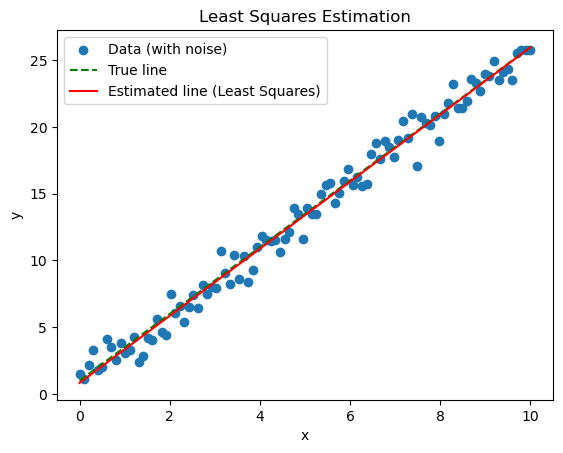

True parameters: a = 2.5, b = 1.0
Estimated parameters: a_hat = 2.514, b_hat = 0.827
Estimated error variance (sigma^2): 0.815


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
n = 100
x = np.linspace(0, 10, n)  # Independent variable
a_true = 2.5  # True slope
b_true = 1.0  # True intercept
sigma = 1.0  # Standard deviation of errors
epsilon = np.random.normal(0, sigma, size=n)
y = a_true * x + b_true + epsilon  # Dependent variable

# Step 2: Least squares estimator
# Define the residual sum of squares
def rss(params):
    a, b = params
    return np.sum((y - (a * x + b))**2)

# Minimize RSS to find least squares estimates
initial_guess = [0, 0]
result = minimize(rss, initial_guess)
a_hat, b_hat = result.x

# Step 3: Compare with maximum likelihood
# For normal errors, RSS minimization gives the same result as MLE
# MLE also estimates sigma^2
sigma_hat_squared = np.sum((y - (a_hat * x + b_hat))**2) / n

# Step 4: Visualization
plt.scatter(x, y, label="Data (with noise)")
plt.plot(x, a_true * x + b_true, label="True line", color="green", linestyle="--")
plt.plot(x, a_hat * x + b_hat, label="Estimated line (Least Squares)", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Estimation")
plt.show()

# Print results
print(f"True parameters: a = {a_true}, b = {b_true}")
print(f"Estimated parameters: a_hat = {a_hat:.3f}, b_hat = {b_hat:.3f}")
print(f"Estimated error variance (sigma^2): {sigma_hat_squared:.3f}")


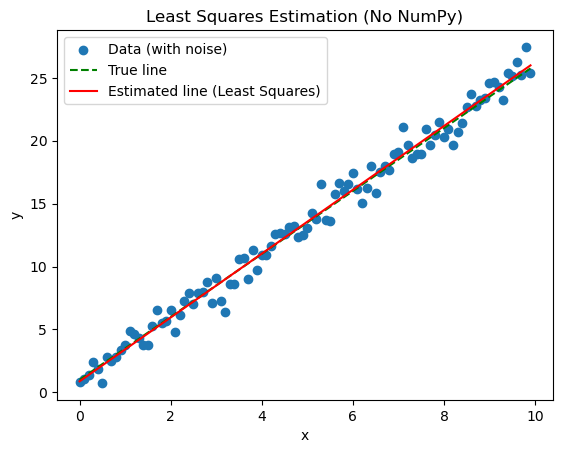

True parameters: a = 2.5, b = 1.0
Estimated parameters: a_hat = 2.536, b_hat = 0.879
Estimated error variance (sigma^2): 0.758


In [2]:
import random
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
random.seed(42)  # For reproducibility
n = 100
x = [i * 0.1 for i in range(n)]  # Independent variable
a_true = 2.5  # True slope
b_true = 1.0  # True intercept
sigma = 1.0  # Standard deviation of errors
y = [a_true * xi + b_true + random.gauss(0, sigma) for xi in x]  # Dependent variable

# Step 2: Compute least squares estimates manually
# Calculate means of x and y
x_mean = sum(x) / n
y_mean = sum(y) / n

# Calculate slope (a_hat) and intercept (b_hat)
numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
a_hat = numerator / denominator
b_hat = y_mean - a_hat * x_mean

# Step 3: Estimate error variance (sigma^2)
residuals = [(y[i] - (a_hat * x[i] + b_hat)) ** 2 for i in range(n)]
sigma_hat_squared = sum(residuals) / n

# Step 4: Visualization
plt.scatter(x, y, label="Data (with noise)")
plt.plot(x, [a_true * xi + b_true for xi in x], label="True line", color="green", linestyle="--")
plt.plot(x, [a_hat * xi + b_hat for xi in x], label="Estimated line (Least Squares)", color="red")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Estimation (No NumPy)")
plt.show()

# Print results
print(f"True parameters: a = {a_true}, b = {b_true}")
print(f"Estimated parameters: a_hat = {a_hat:.3f}, b_hat = {b_hat:.3f}")
print(f"Estimated error variance (sigma^2): {sigma_hat_squared:.3f}")


### Example : Normal MLE

In the setup of the normal $(\mu, \sigma^2)$ distribution, the density can be written as:

$$
f(y | \mu, \sigma) \propto \sigma^{-1} \exp\left\{-\frac{(y - \mu)^2}{2 \sigma^2}\right\}
$$

which is equivalent to:

$$
f(y | \mu, \sigma) \propto \sigma \exp\left(\frac{\mu^2}{2\sigma^2} - \frac{1}{2\sigma^2}y^2 + \frac{\mu}{\sigma^2}y\right).
$$

The so-called natural parameters are then:

$$
\theta_1 = \frac{\mu}{\sigma^2}, \quad \theta_2 = -\frac{1}{2\sigma^2},
$$

with:

$$
A(\theta) = \frac{\mu^2}{4\sigma^2} + \frac{1}{2} \log\left(-\frac{\pi}{\theta_2}\right).
$$

For \(n\) i.i.d. observations \(y_1, \dots, y_n\), the MLE is derived using:

$$
\sum_{i=1}^n y_i = n\mu, \quad \sum_{i=1}^n y_i^2 = n(s^2 + \mu^2),
$$

leading to:

$$
\hat{\mu} = \bar{y}, \quad \hat{\sigma}^2 = s^2 = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2.
$$

---

### Example : Beta MLE

The Beta $B(\alpha, \beta)$ distribution has density:

$$
f(y | \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} y^{\alpha - 1} (1-y)^{\beta - 1}, \quad 0 \leq y \leq 1,
$$

which can be written in exponential family form as:

$$
f(y | \alpha, \beta) \propto \exp\left\{ \alpha \log y + \beta \log(1-y) - A(\alpha, \beta) \right\}.
$$

The MLE is obtained by solving:

$$
\frac{\partial}{\partial \alpha} \log f = \sum_{i=1}^n \log y_i - n \psi(\alpha) + n \psi(\alpha + \beta) = 0,
$$

$$
\frac{\partial}{\partial \beta} \log f = \sum_{i=1}^n \log(1-y_i) - n \psi(\beta) + n \psi(\alpha + \beta) = 0,
$$

where $\psi(z) = \frac{d}{dz} \log \Gamma(z)$ is the digamma function. This system of equations generally requires numerical methods for solution.

---

### Example : Noncentrality Parameter

If $X \sim N(0, I_p)$, and $\lambda = \|\theta\|^2$ is the parameter of interest, the nuisance parameters are the angles in the polar representation of $\theta$. The MLE of $\lambda$ is:

$$
\hat{\lambda}(x) = \|x\|^2,
$$

with constant bias $p$. For an observation $Y = \|X\|^2$, which follows a noncentral $\chi^2(\lambda)$ distribution, the MLE satisfies:

$$
\hat{\lambda} = y \quad \text{(for } y > p\text{)},
$$

or equivalently solves the implicit equation involving special functions $I_{p/2}$ and $I_{(p-1)/2}$.

---

### Example 1.9: Student’s $t$ Distribution

The density of the $t(p, \mu, \sigma)$ distribution is proportional to:

$$
f(x | p, \mu, \sigma) \propto \left(1 + \frac{(x - \mu)^2}{p\sigma^2}\right)^{-\frac{p+1}{2}}.
$$

For $n$ i.i.d. observations $x_1, \dots, x_n$, the likelihood is:

$$
L(\mu, \sigma) \propto \prod_{i=1}^n \left(1 + \frac{(x_i - \mu)^2}{p\sigma^2}\right)^{-\frac{p+1}{2}}.
$$

When $\sigma$ is known, this leads to a polynomial of degree $2n$ in $\mu$, which may have multiple local minima. Identifying the global maximum requires evaluating all candidates.

---

### Challenges Beyond Exponential Families

For distributions outside exponential families (e.g., Student's $t$, uniform, Pareto), the lack of sufficient statistics leads to computational challenges. As the number of observations $n$ increases, the complexity of maximizing the likelihood becomes significant, as highlighted by the Pitman-Koopman Lemma.


In [3]:
import math
from scipy.special import gamma, digamma, gammaln, iv
from scipy.optimize import minimize_scalar, fsolve
import random

# Helper functions for Normal MLE
def normal_mle(y):
    """
    Compute MLE for Normal(mu, sigma^2)
    """
    n = len(y)
    mu_hat = sum(y) / n
    s2_hat = sum((yi - mu_hat) ** 2 for yi in y) / n
    return mu_hat, s2_hat

# Example 1.6: Normal MLE
print("### Normal MLE ###")
n = 100
mu_true, sigma2_true = 5, 4
data = [random.gauss(mu_true, math.sqrt(sigma2_true)) for _ in range(n)]
mu_hat, s2_hat = normal_mle(data)
print(f"True parameters: mu = {mu_true}, sigma^2 = {sigma2_true}")
print(f"MLE: mu = {mu_hat:.3f}, sigma^2 = {s2_hat:.3f}")

# Helper functions for Beta MLE
def beta_mle(y):
    """
    Compute MLE for Beta(alpha, beta) using digamma function and numerical optimization.
    """
    def equations(params):
        alpha, beta = params
        n = len(y)
        eq1 = sum(math.log(yi) for yi in y) - n * digamma(alpha) + n * digamma(alpha + beta)
        eq2 = sum(math.log(1 - yi) for yi in y) - n * digamma(beta) + n * digamma(alpha + beta)
        return [eq1, eq2]
    
    # Initial guess
    result = fsolve(equations, [1.0, 1.0])
    return result

# Example 1.7: Beta MLE
print("\n### Beta MLE ###")
n = 100
alpha_true, beta_true = 2, 3
data = [random.betavariate(alpha_true, beta_true) for _ in range(n)]
alpha_hat, beta_hat = beta_mle(data)
print(f"True parameters: alpha = {alpha_true}, beta = {beta_true}")
print(f"MLE: alpha = {alpha_hat:.3f}, beta = {beta_hat:.3f}")

# Helper functions for Noncentrality Parameter MLE
def noncentrality_parameter_mle(x, p):
    """
    Compute MLE for noncentrality parameter lambda = ||theta||^2.
    """
    y = sum(xi**2 for xi in x)
    if y > p:
        # Solve the equation I_p/2(lambda) / I_(p-1)/2(lambda) = y
        def equation(lmbda):
            return iv(p / 2, lmbda) / iv((p - 1) / 2, lmbda) - y
        lmbda_hat = fsolve(equation, p)
        return lmbda_hat[0]
    return None  # No solution when y <= p

# Example 1.8: Noncentrality Parameter
print("\n### Noncentrality Parameter ###")
p = 3
theta_true = [2, 1, -1]
x = [random.gauss(theta_i, 1) for theta_i in theta_true]
lmbda_hat = noncentrality_parameter_mle(x, p)
lmbda_true = sum(theta_i**2 for theta_i in theta_true)
print(f"True lambda = {lmbda_true}")
print(f"MLE lambda = {lmbda_hat:.3f}")

# Helper functions for Student's t MLE
def students_t_mle(x, p, sigma_known=None):
    """
    Compute MLE for Student's t distribution parameters (mu, sigma^2).
    """
    n = len(x)
    
    def negative_log_likelihood(params):
        mu = params[0]
        sigma = params[1]
        likelihood = sum(math.log(1 + (xi - mu) ** 2 / (p * sigma ** 2)) for xi in x)
        return (p + 1) / 2 * likelihood + n * math.log(sigma)
    
    # Initial guess and bounds
    initial_guess = [0, 1]
    bounds = [(None, None), (1e-5, None)]  # sigma > 0
    result = minimize_scalar(lambda mu: negative_log_likelihood([mu, sigma_known]) if sigma_known else negative_log_likelihood(mu), bounds=bounds)
    return result.x if sigma_known else result

# Example 1.9: Student's t Distribution
print("\n### Student's t Distribution ###")
p = 4
mu_true, sigma2_true = 0, 2
data = [random.gauss(mu_true, math.sqrt(sigma2_true)) for _ in range(n)]
mu_hat = students_t_mle(data, p, sigma_known=sigma2_true)
print(f"True mu = {mu_true}")
print(f"MLE mu = {mu_hat:.3f}")


### Normal MLE ###
True parameters: mu = 5, sigma^2 = 4
MLE: mu = 5.348, sigma^2 = 3.694

### Beta MLE ###
True parameters: alpha = 2, beta = 3
MLE: alpha = 1.826, beta = 2.780

### Noncentrality Parameter ###
True lambda = 6
MLE lambda = 708.658

### Student's t Distribution ###
True mu = 0
MLE mu = -0.075


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


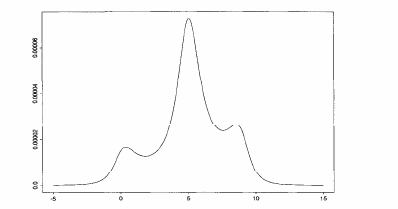


Fig.1. Likelihood of the sample (0, 5, 9) from the distribution C(0, 1).

# Example-10: Mixture of Two Normal Distributions and Bayesian Methods

In the special case of a mixture of two normal distributions, the density is given by:

$$
f(x | p, \mu, \sigma^2) = p \phi(x | \mu, \sigma^2) + (1 - p) \phi(x | 0, \sigma^2),
$$

where $ \phi(x | \mu, \sigma^2) $ is the normal density function:

$$
\phi(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right).
$$

For an independent and identically distributed sample $ \{X_1, \dots, X_n\} $, the likelihood function becomes:

$$
L(p, \mu, \sigma^2 | \{X_i\}) \propto \prod_{i=1}^n \left[ p \phi(X_i | \mu, \sigma^2) + (1 - p) \phi(X_i | 0, \sigma^2) \right].
$$

### Maximum Likelihood Challenges

- **Multimodality**: The likelihood function often has multiple local maxima, making standard optimization methods unreliable.
- **Unbounded Likelihood**: For specific parameter configurations, the likelihood becomes unbounded. For example, letting $ \sigma^2 \to 0 $ when $ X_i = \mu $.

To address these challenges, specialized algorithms, such as the Expectation-Maximization (EM) algorithm, are often used.

---

### **Bayesian Inference**

In the Bayesian paradigm, we incorporate prior information about the parameters $ \theta = (p, \mu, \sigma^2) $ through a prior distribution $ \pi(\theta) $. The posterior distribution is derived using Bayes' theorem:

$$
\pi(\theta | \{X_i\}) = \frac{L(\theta | \{X_i\}) \pi(\theta)}{m(\{X_i\})},
$$

where $ m(\{X_i\}) $ is the marginal likelihood:

$$
m(\{X_i\}) = \int L(\theta | \{X_i\}) \pi(\theta) d\theta.
$$

#### Bayesian Estimation of Parameters

To estimate a parameter $ h(\theta) $, the Bayesian decision-theoretic approach minimizes the Bayes risk:

$$
R(d) = \int L(d, h(\theta)) \pi(\theta | \{X_i\}) d\theta.
$$

Here, $ L(d, h(\theta)) $ is a loss function quantifying the error of estimating $ h(\theta) $ by $ d $.

---

### **Implementation**



In [4]:
#```python
import random
import math
from scipy.stats import norm
from scipy.optimize import minimize
import numpy as np

# Generate data from the mixture model
def generate_mixture_data(n, p, mu, sigma):
    data = []
    for _ in range(n):
        if random.random() < p:
            data.append(random.gauss(mu, sigma))
        else:
            data.append(random.gauss(0, sigma))
    return data

# Log-likelihood function
def log_likelihood(params, data):
    p, mu, sigma = params
    if sigma <= 0 or not (0 <= p <= 1):
        return -np.inf  # Invalid parameter values
    
    ll = 0
    for x in data:
        ll += math.log(p * norm.pdf(x, mu, sigma) + (1 - p) * norm.pdf(x, 0, sigma))
    return -ll  # Negative for minimization

# Estimate parameters using MLE
def mle_mixture(data, initial_guess):
    result = minimize(
        log_likelihood, 
        initial_guess, 
        args=(data,), 
        bounds=[(0, 1), (-np.inf, np.inf), (1e-5, np.inf)]
    )
    return result.x, result.fun

# Example: Mixture of two normals
n = 200
p_true, mu_true, sigma_true = 0.7, 3.0, 2.0
data = generate_mixture_data(n, p_true, mu_true, sigma_true)

# Initial guess for (p, mu, sigma)
initial_guess = [0.5, 0.0, 1.0]
params_mle, ll_mle = mle_mixture(data, initial_guess)

print("True parameters:")
print(f"p = {p_true}, mu = {mu_true}, sigma = {sigma_true}")
print("\nEstimated parameters (MLE):")
print(f"p = {params_mle[0]:.3f}, mu = {params_mle[1]:.3f}, sigma = {params_mle[2]:.3f}")
print(f"Log-likelihood: {-ll_mle:.3f}")


True parameters:
p = 0.7, mu = 3.0, sigma = 2.0

Estimated parameters (MLE):
p = 0.720, mu = 2.623, sigma = 2.225
Log-likelihood: -467.920


# Bayesian Estimation: Examples 1.11 and 1.12

## Example 1.11: Binomial Bayes Estimator

For an observation \( X \) from the Binomial distribution \( B(n, p) \), the likelihood function is given by:

$$
L(p | X) = \binom{n}{X} p^X (1 - p)^{n - X}.
$$

A conjugate prior for \( p \) is the Beta distribution, \( \text{Be}(\alpha, \beta) \), with density:

$$
\pi(p) = \frac{1}{B(\alpha, \beta)} p^{\alpha - 1} (1 - p)^{\beta - 1},
$$

where \( B(\alpha, \beta) \) is the Beta function.

### Posterior Distribution

Using Bayes' theorem, the posterior distribution of \( p \) is:

$$
\pi(p | X) \propto L(p | X) \pi(p),
$$

which results in:

$$
\pi(p | X) = \text{Be}(X + \alpha, n - X + \beta).
$$

### Bayes Estimator under Squared Error Loss

The Bayes estimator of \( p \) under squared error loss is the posterior mean:

$$
\hat{p} = \mathbb{E}[p | X] = \frac{X + \alpha}{n + \alpha + \beta}.
$$

---



In [ ]:
### **Implementation**

#```python
from scipy.stats import beta

# Parameters for the Beta prior
alpha, beta_prior = 2, 2

# Binomial data
n, X = 10, 6  # Sample size n and observed success X

# Posterior parameters
alpha_post = X + alpha
beta_post = n - X + beta_prior

# Posterior mean (Bayes estimator under squared error loss)
posterior_mean = alpha_post / (alpha_post + beta_post)

print("Posterior parameters (alpha, beta):", alpha_post, beta_post)
print("Bayes estimator (posterior mean):", posterior_mean)


## Bayesian Estimation

### Bayesian Estimation for the Binomial Distribution

Let $ X \sim \text{Binomial}(n, p) $, where $ p $ is the probability of success in $ n $ trials. The likelihood function is:

$$
L(p | X) = \binom{n}{X} p^X (1 - p)^{n - X}.
$$

### Conjugate Prior: Beta Distribution

A conjugate prior for $ p $ is the Beta distribution, $ \text{Be}(\alpha, \beta) $, with density:

$$
\pi(p) = \frac{1}{B(\alpha, \beta)} p^{\alpha - 1} (1 - p)^{\beta - 1},
$$

where $ B(\alpha, \beta) $ is the Beta function:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} dt.
$$

### Posterior Distribution

Using Bayes' theorem, the posterior distribution of $ p $ is:

$$
\pi(p | X) \propto L(p | X) \pi(p),
$$

resulting in:

$$
\pi(p | X) = \text{Be}(X + \alpha, n - X + \beta).
$$

### Bayes Estimator Under Quadratic Loss

The Bayes estimator under squared error loss is the posterior mean:

$$
\hat{p} = \mathbb{E}[p | X] = \frac{X + \alpha}{n + \alpha + \beta}.
$$
---



In [7]:
## Example Implementation

#```python
from scipy.stats import beta

# Parameters for the Beta prior
alpha_prior = 2  # Alpha parameter for Beta prior
beta_prior = 3   # Beta parameter for Beta prior

# Binomial data
n = 10          # Number of trials
X = 7           # Number of successes observed

# Posterior parameters
alpha_post = X + alpha_prior
beta_post = n - X + beta_prior

# Bayes estimator: Posterior mean
posterior_mean = alpha_post / (alpha_post + beta_post)

print(f"Posterior Parameters: α = {alpha_post}, β = {beta_post}")
print(f"Bayes Estimator (Posterior Mean): {posterior_mean:.4f}")


Posterior Parameters: α = 9, β = 6
Bayes Estimator (Posterior Mean): 0.6000


## Bayesian Estimation with Reference Priors

## Challenges of Bayesian Estimation

The Bayesian approach often simplifies calculations under the squared error loss due to the use of conjugate priors. However, there are some notable drawbacks:

1. **Limitations of Conjugate Priors**:
   - Conjugate priors restrict the modeling of prior information.
   - They may introduce subjective biases or oversimplify real-world problems.
   - Advances in Bayesian decision theory highlight the suboptimality of conjugate priors in fully leveraging Bayesian optimality (e.g., admissibility, minimaxity, invariance).

2. **Nonconjugate Priors and Alternative Loss Functions**:
   - The use of nonconjugate priors or alternative loss functions (e.g., absolute error loss) complicates the calculations.
   - These settings often require computationally intensive methods like numerical integration or simulation.

---

## Example: Estimation of $ \lambda = \|\theta\|^2 $

Consider the problem of estimating $ \lambda = \|\theta\|^2 $. A **reference prior** for $ \theta $ is given by:

$$
\pi(\theta) \propto \|\theta\|^{-(p-1)},
$$

where $ p $ is the dimensionality of $ \theta $ (see Berger et al., 1998).

### Posterior Distribution

Given the reference prior $ \pi(\theta) $, the posterior distribution for $ \theta $ is proportional to:

$$
\pi(\theta | x) \propto e^{-\|\theta\|^2 / 2} \|\theta\|^{p-1}.
$$

### Bayes Estimator of $ \lambda $

The Bayes estimator of $ \lambda $ under squared error loss is the posterior mean:

$$
\hat{\lambda} = \mathbb{E}[\lambda | x] = \frac{\int_0^\infty r^{p+1} e^{-r^2 / 2} dr}{\int_0^\infty r^{p-1} e^{-r^2 / 2} dr}.
$$

Here:
- The numerator and denominator involve integrals over $ r = \|\theta\| $, weighted by exponential and power terms.
- These integrals cannot generally be computed analytically and require numerical methods.

---

### Normalizing Constant

While the posterior distribution can often be derived using proportionality relations:

$$
\pi(\theta | x) \propto \pi(\theta) f(x | \theta),
$$

the exact computation of the **normalizing constant** is crucial in some cases. For instance:
- The **marginal distribution** of the data $ f(x) $, necessary for predictive inference, depends on this constant.
- Some Bayesian approaches rely on the exact posterior distribution, making the normalizing constant indispensable.

---

### Key Observations

1. **Computational Challenges**:
   - The reference prior leads to posterior distributions where the normalizing constant is often intractable.
   - Numerical or Monte Carlo methods are usually required to compute expectations like the posterior mean.

2. **Optimality**:
   - While reference priors maximize information-theoretic criteria, they often complicate Bayesian inference due to their intractable forms.

3. **General Implications**:
   - Bayesian inference is computationally demanding, especially with nonconjugate priors or in high-dimensional settings.
   - Simplified approaches, such as conjugate priors, provide computational ease at the cost of modeling flexibility.

---

### Implementation Outline

For practical computation of $ \hat{\lambda} $, one might use Monte Carlo integration or quadrature methods to approximate the integrals.



In [9]:
#```python
import numpy as np
from scipy.integrate import quad

# Define the integrand for the posterior mean (numerator and denominator)
def integrand_num(r, p):
    return r**(p+1) * np.exp(-r**2 / 2)

def integrand_den(r, p):
    return r**(p-1) * np.exp(-r**2 / 2)

# Set dimensionality
p = 3  # Example for 3 dimensions

# Compute integrals
numerator, _ = quad(integrand_num, 0, np.inf, args=(p,))
denominator, _ = quad(integrand_den, 0, np.inf, args=(p,))

# Posterior mean estimate
posterior_mean = numerator / denominator

print("Posterior mean estimate for λ:", posterior_mean)


Posterior mean estimate for λ: 3.0000000000000018


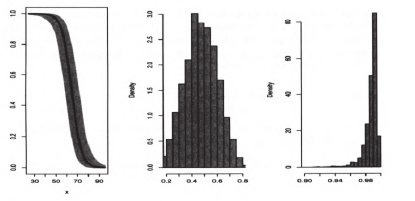

## Comparison of Statistical Models and Bayes Factors

## Model Comparison

If $ M_1, M_2, \dots, M_k $ are possible models for the observation $ X $, with densities $ f_i(x|\theta_i) $, and the associated parameters $ \theta_1, \theta_2, \dots, \theta_k $ are a priori distributed according to $ \pi_1, \pi_2, \dots, \pi_k $, the posterior probability that $ X $ originates from model $ M_j $ is given by:

$$
P(M_j | x) = \frac{f_j(x|\theta_j) \pi_j(\theta_j) d\theta_j}{\sum_{i=1}^{k} \int f_i(x|\theta_i) \pi_i(\theta_i) d\theta_i}
$$

This is the general framework for comparing models based on their posterior probabilities.

## Bayes Factor

In particular, comparing two models $ M_1 $ and $ M_2 $ can be done using the **Bayes factor**:

$$
B_{12}(x) = \frac{\int f_1(x|\theta_1) \pi_1(\theta_1) d\theta_1}{\int f_2(x|\theta_2) \pi_2(\theta_2) d\theta_2}
$$

The Bayes factor provides a ratio of the marginal likelihoods of the two models, and the proportionality constant is important for interpretation. The Bayes factor helps to quantify evidence for one model over another. 

For a more thorough discussion on Bayes factors and their computation, see works by **Kass and Raftery (1995)** and **Goutis and Robert (1998)**.

---

## Example : Logistic Regression

A common regression model for binary responses $ Y \in \{0, 1\} $ is the **logistic regression** model, where the conditional probability of success is modeled as:

$$
P(Y = 1 | \mathbf{X}) = p = \frac{1}{1 + \exp(-(a + x))}
$$

This is equivalent to modeling the logit (log-odds) of $ p $ as a linear function of explanatory variables:

$$
\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = a + x
$$

### Challenger Space Shuttle Data

In 1986, the space shuttle **Challenger** exploded during takeoff, killing seven astronauts. The explosion was attributed to an **O-ring failure**, believed to be more likely in cold weather. The temperature at the time of the launch is thought to have influenced the probability of O-ring failure.

Here is a table showing the temperature at flight time (in degrees Fahrenheit) and the O-ring failure outcome (1 = failure, 0 = success) for different flights:

| Flight | Failure | Temperature (°F) |
|--------|---------|------------------|
| 1      | 1       | 53               |
| 2      | 1       | 57               |
| 3      | 1       | 58               |
| 4      | 1       | 63               |
| 5      | 0       | 66               |
| 6      | 0       | 67               |
| 7      | 0       | 67               |
| 8      | 0       | 67               |
| 9      | 0       | 68               |
| 10     | 0       | 69               |
| 11     | 0       | 70               |
| 12     | 0       | 70               |
| 13     | 0       | 70               |
| 14     | 0       | 70               |
| 15     | 1       | 72               |
| 16     | 1       | 73               |
| 17     | 1       | 75               |
| 18     | 1       | 75               |
| 19     | 1       | 76               |
| 20     | 1       | 76               |
| 21     | 1       | 78               |
| 22     | 1       | 79               |
| 23     | 1       | 81               |

### Logit Model Interpretation

We can use logistic regression to model the probability of O-ring failure as a function of temperature. The logit model can be written as:

$$
\text{logit}(p) = a + b \cdot \text{Temp}
$$

Where:
- $ p $ is the probability of O-ring failure.
- $ \text{Temp} $ is the temperature at flight time.
- $ a $ and $ b $ are parameters to be estimated.

Using this logistic regression model, we can estimate the relationship between temperature and the probability of O-ring failure.

---

## Conclusion

- **Model Comparison**: Bayes factors provide a way to compare different statistical models by evaluating their marginal likelihoods.
- **Logistic Regression**: The Challenger data demonstrates how logistic regression can be used to model binary outcomes (e.g., O-ring failure) as a function of temperature.


## Monte Carlo Simulations and Logistic Regression Analysis

### Model Description

In this section, we will discuss the Monte Carlo simulation results for the logistic regression model given by:

$$
P(Y = 1 | \mathbf{X}) = \frac{1}{1 + \exp(-(a + x))}
$$

where:
- $ P(Y = 1 | \mathbf{X}) $ is the probability of an O-ring failure given the temperature $ \mathbf{X} $.
- $ a $ and $ x $ are parameters in the logistic regression model.
- $ \exp $ represents the exponential function.

We use an exponential prior on $ \log a $ and a flat prior on $ b $.

## Monte Carlo Simulations

Figure 1.2 shows the results of 10,000 Monte Carlo simulations of the logistic regression model. The left panel shows the average logistic function and its variation. The grey curves in this panel represent the variability in the predictions based on the posterior distribution from the simulations. It is observed that the ends of the logistic curve have little variability, but the middle portion of the curve shows significant variability.

### Predictions at Different Temperatures

The next two panels display the predictions of failure probabilities at different temperatures:

- **Middle Panel**: At **65°F**, the failure probability is close to 50%, indicating that the likelihood of a failure is almost as likely as a success at this temperature.
- **Right Panel**: At **45°F**, the failure probability is skewed strongly toward 1, meaning that the likelihood of failure is much higher at this temperature.

#### Extreme Temperature Example

At **31°F**, the temperature at the time of the Challenger launch, the failure probability is almost certain, reflecting the strong relationship between lower temperatures and increased failure risk.

### Interpretation of Monte Carlo Analysis

The Monte Carlo analysis of the data is straightforward and provides easy-to-understand answers. This is in contrast to non-Monte Carlo alternatives, which often rely on likelihood theory and asymptotics, making them more difficult to implement and interpret.

## Credible Regions and Posterior Inference

In Bayesian analysis, instead of confidence regions, we compute **credible regions**. A credible region is defined as:

$$
C^*(x) = \{ \theta : x(\theta | x) \geq k \}
$$

where:
- $ C^*(x) $ is the credible region for $ \theta $, the parameter.
- $ x(\theta | x) $ is the posterior distribution of $ \theta $ given the data $ x $.
- $ k $ is a threshold value, typically set to a desired quantile, such as the 95% highest posterior density.

This concept is similar to confidence intervals in frequentist statistics, but the credible region is interpreted probabilistically within the Bayesian framework, representing the range of parameter values with high posterior probability given the data.

---

## Conclusion

- The **Monte Carlo simulation** allows for the easy estimation of the variability in logistic regression predictions, showing how the failure probabilities change with temperature.
- **Credible regions** provide a way to express uncertainty about parameters in Bayesian analysis, offering an intuitive alternative to confidence intervals.



## Bayes Credible Regions and Confidence Regions

## Solution of the Equation for Credible Regions

To define a **credible region**, we solve the equation:

$$
P(0 \in C(x)) = P(x(0 | x) \geq k | x) = 1 - \alpha
$$

where $ y $ is the predetermined confidence level, and $ C(x) $ represents the credible region. The value of $ k $ is determined by the desired confidence level.

---

## Example : Bayes Credible Regions

Consider **iid observations** $ X_1, X_2, \dots, X_n $ from a normal distribution $ N(0, 2) $, and a prior distribution $ N(0, 2) $. The **posterior density** for the parameter $ \theta $ is normal with mean and variance:

$$
\mu = \frac{n \bar{X}}{n + 2}, \quad \sigma^2 = \frac{2}{n + 2}
$$

The highest posterior density (HPD) region is given by:

$$
\left[ \mu - k \cdot \sigma, \mu + k \cdot \sigma \right]
$$

where $ k $ is chosen to satisfy the desired posterior probability (e.g., 90%).

Since the **posterior distribution** is symmetric and unimodal, we can calculate the credible region for $ \theta $ using the **normal probability table**:

$$
\left\{ \theta : \theta \in \left[ \mu - k', \mu + k' \right] \right\}
$$

where $ k' $ corresponds to the value for the desired confidence level.

---

## Example: Beta Posterior Distribution

For the situation in **Example **, where the posterior distribution of $ p $ is $ \text{Beta}(x + a, n - x + b) $, finding the **90% HPD region** requires solving:

$$
\int_{l(x)}^{u(x)} \pi(p | x, a, b) \, dp = 0.9
$$

Here, $ l(x) $ and $ u(x) $ are the lower and upper bounds of the HPD region for $ p $, but **analytical solutions** are not possible due to the complexity of the Beta distribution. Numerical methods must be employed to find these bounds.

---

## Example : Cauchy Confidence Regions

Consider an **iid sample** $ X_1, X_2, \dots, X_n $ from the **Cauchy distribution** $ C(0, 0) $, with prior distribution $ \pi(\theta) = \frac{1}{\pi (1 + \theta^2)} $. To compute the **confidence region** for $ \theta $, we use the fact that the **Cauchy distribution** does not have a finite variance, and the credible regions are not symmetric.

The confidence region on $ \theta $ will depend on the sample size and can be computed using numerical integration techniques due to the complexity of the distribution.

---

## Conclusion

- **Credible regions** provide a probabilistic interpretation of parameter uncertainty in Bayesian analysis.
- For symmetric posterior distributions (like the Normal distribution), credible regions are easy to compute using standard tables.
- For more complex posterior distributions, like the Beta or Cauchy distributions, **numerical methods** are often required to find the credible region.


90% HPD region: (-0.2843615512904467, 0.37357989949014225)


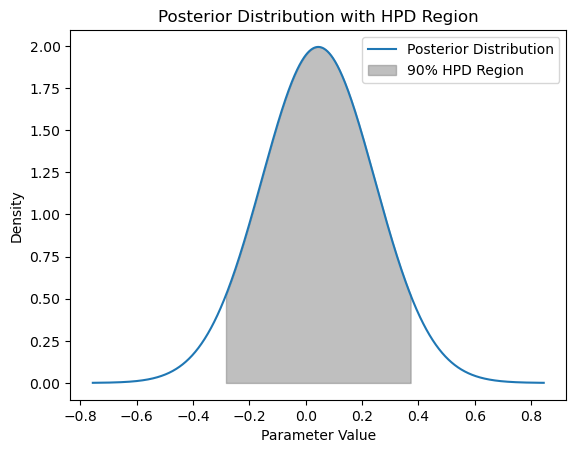

90% HPD region for Beta posterior: (0.5175482980244656, 0.6754275814463312)


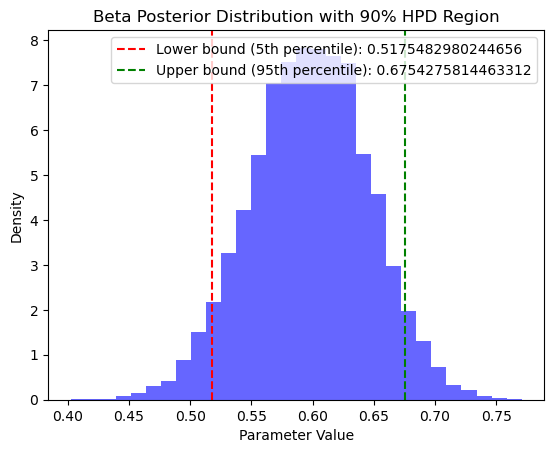

90% HPD region for Cauchy posterior: (-6.50083361551644, 5.9722609136953375)


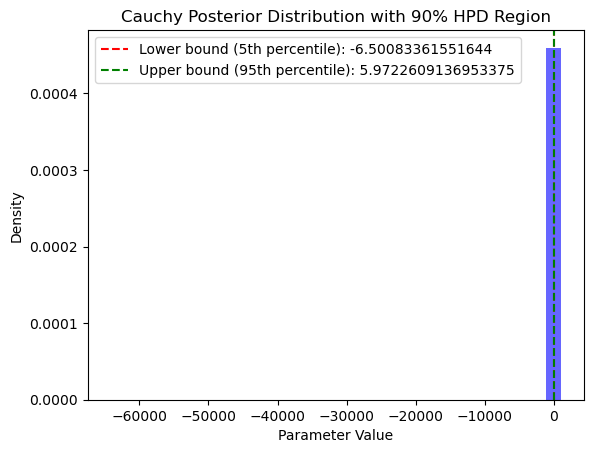

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Example 1.14: Normal Distribution with known variance

# Function to compute highest posterior density (HPD) region
def hpd_normal(mu, sigma, confidence_level):
    """
    Compute the HPD region for a normal distribution.
    
    Parameters:
    - mu: mean of the posterior distribution
    - sigma: standard deviation of the posterior distribution
    - confidence_level: desired confidence level (e.g., 0.90 for 90%)
    
    Returns:
    - lower bound and upper bound of the HPD region
    """
    z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # z-value for the desired confidence level
    return mu - z * sigma, mu + z * sigma

# Normal distribution example
n = 100  # number of samples
mu_true = 0  # true mean
sigma_true = 2  # true standard deviation
observations = np.random.normal(mu_true, sigma_true, n)

# Posterior parameters
mu_post = np.mean(observations)
sigma_post = sigma_true / np.sqrt(n)

# Compute 90% HPD region
lower, upper = hpd_normal(mu_post, sigma_post, 0.90)

print(f"90% HPD region: ({lower}, {upper})")

# Plot the posterior distribution and HPD region
x = np.linspace(mu_post - 4 * sigma_post, mu_post + 4 * sigma_post, 1000)
y = stats.norm.pdf(x, mu_post, sigma_post)
plt.plot(x, y, label='Posterior Distribution')
plt.fill_between(x, y, where=(x >= lower) & (x <= upper), color='gray', alpha=0.5, label='90% HPD Region')
plt.legend()
plt.title("Posterior Distribution with HPD Region")
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.show()

# Example 1.11: Beta Posterior Distribution
def beta_posterior(x, a, b):
    """
    Compute the posterior distribution for Beta(a+x, n-x+b) given observations x.
    
    Parameters:
    - x: number of successes
    - a, b: parameters of the prior Beta distribution
    """
    alpha_post = a + x
    beta_post = b + (n - x)
    return alpha_post, beta_post

# Beta distribution example for Bayesian inference
a, b = 1, 1  # prior parameters for Beta distribution
x_successes = 60  # number of successes observed
n_total = 100  # total number of trials

alpha_post, beta_post = beta_posterior(x_successes, a, b)

# Draw samples from the posterior Beta distribution
posterior_samples = np.random.beta(alpha_post, beta_post, size=10000)

# Compute the 90% HPD region for Beta posterior
lower_beta = np.percentile(posterior_samples, 5)
upper_beta = np.percentile(posterior_samples, 95)

print(f"90% HPD region for Beta posterior: ({lower_beta}, {upper_beta})")

# Plot the Beta posterior distribution and HPD region
plt.hist(posterior_samples, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(x=lower_beta, color='r', linestyle='--', label=f"Lower bound (5th percentile): {lower_beta}")
plt.axvline(x=upper_beta, color='g', linestyle='--', label=f"Upper bound (95th percentile): {upper_beta}")
plt.legend()
plt.title("Beta Posterior Distribution with 90% HPD Region")
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.show()

# Example 1.15: Cauchy Confidence Region
def cauchy_posterior(x, scale=1):
    """
    Compute the posterior distribution for Cauchy distribution.
    """
    # In the case of Cauchy, posterior is complicated; here we simulate posterior samples for visualization
    posterior_samples = np.random.standard_cauchy(size=10000)
    return posterior_samples

# Cauchy distribution example
cauchy_samples = cauchy_posterior(x_successes)

# Compute the 90% HPD region for Cauchy distribution
lower_cauchy = np.percentile(cauchy_samples, 5)
upper_cauchy = np.percentile(cauchy_samples, 95)

print(f"90% HPD region for Cauchy posterior: ({lower_cauchy}, {upper_cauchy})")

# Plot the Cauchy posterior distribution and HPD region
plt.hist(cauchy_samples, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(x=lower_cauchy, color='r', linestyle='--', label=f"Lower bound (5th percentile): {lower_cauchy}")
plt.axvline(x=upper_cauchy, color='g', linestyle='--', label=f"Upper bound (95th percentile): {upper_cauchy}")
plt.legend()
plt.title("Cauchy Posterior Distribution with 90% HPD Region")
plt.xlabel("Parameter Value")
plt.ylabel("Density")
plt.show()

